In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
data=pd.read_csv('./kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df = data.copy()

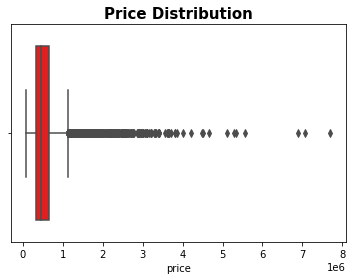

In [6]:
ax = sns.boxplot(data=df, x='price',color='red')
plt.title("Price Distribution",size=15, weight='bold')
plt.show()

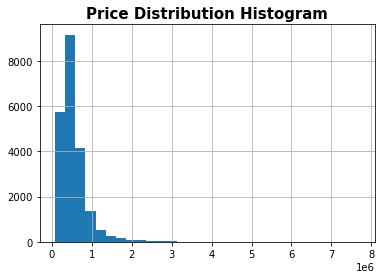

In [7]:
df['price'].hist(bins=30)
plt.title("Price Distribution Histogram",size=15, weight='bold')
plt.show()

In [8]:
df.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Text(0.5, 1.0, 'Pearson Correlation Coefficient Heat Map')

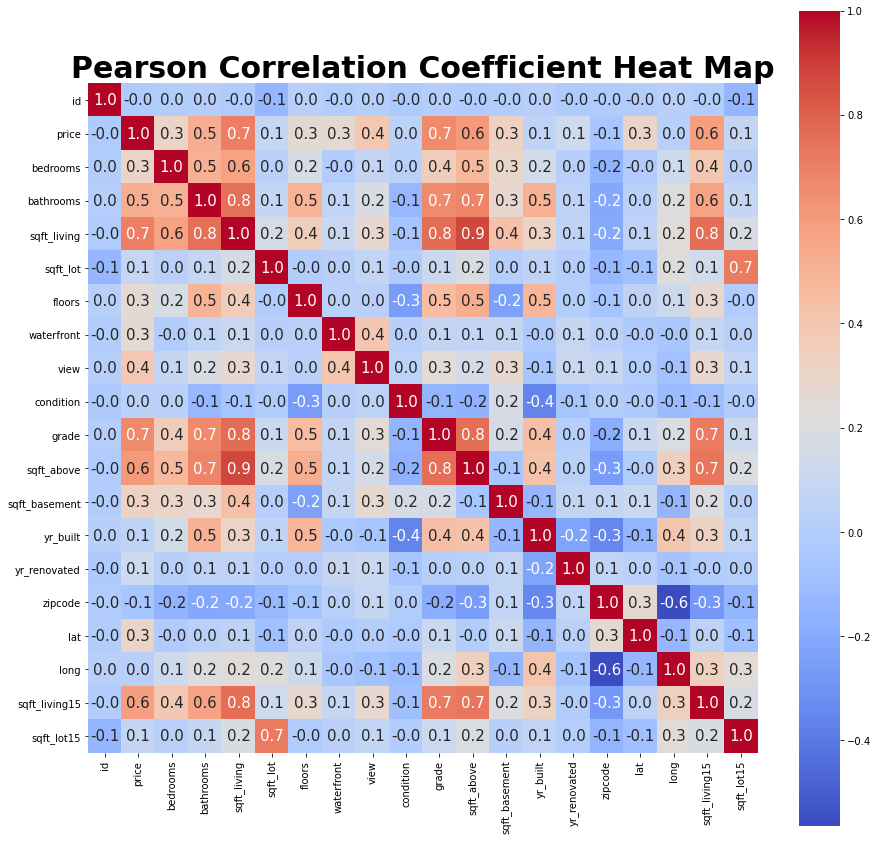

In [9]:
plt.figure(figsize=(15,15))
corr = df.corr(method='pearson')
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='coolwarm')
plt.title("Pearson Correlation Coefficient Heat Map",size=30, weight='bold')

In [10]:
df = df.drop(['id','date','condition','zipcode','lat','long','sqft_living15','sqft_lot15'],axis=1)

In [11]:
sns.set(style="whitegrid", font_scale=1)

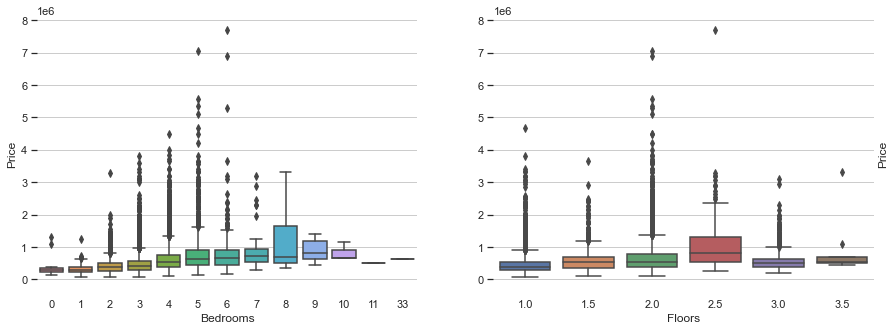

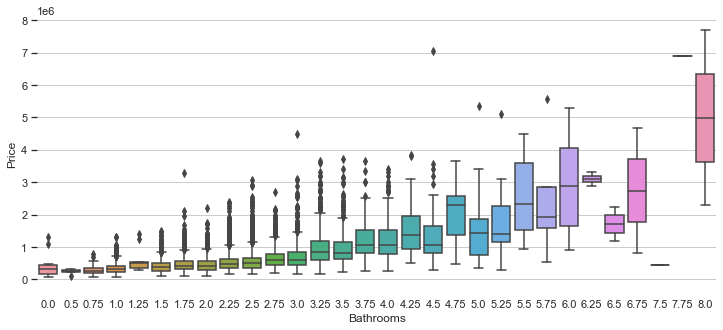

In [12]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_left()
axes[1].set(xlabel='Floors', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=df['bathrooms'],y=df['price'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms', ylabel='Price');

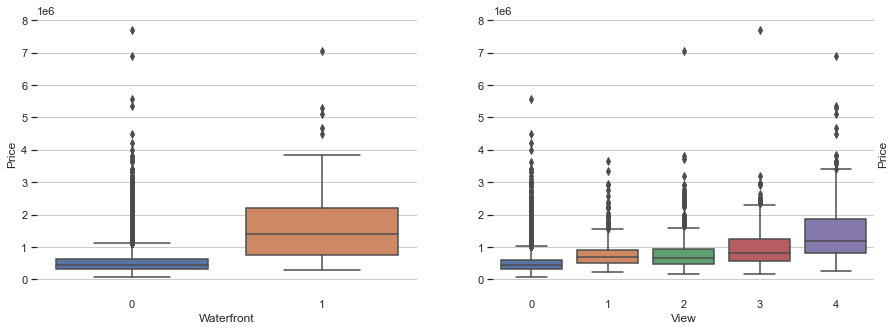

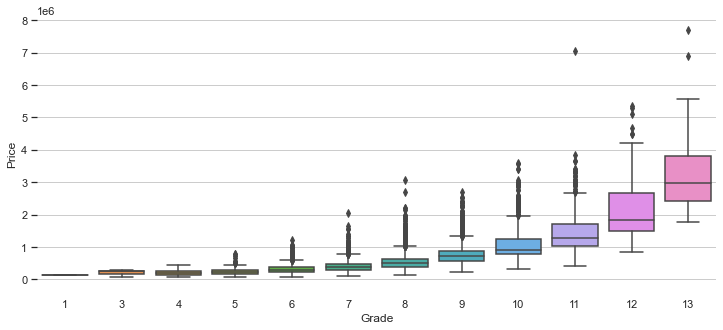

In [13]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['waterfront'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['view'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_left()
axes[1].set(xlabel='View', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=df['grade'],y=df['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='Grade', ylabel='Price');

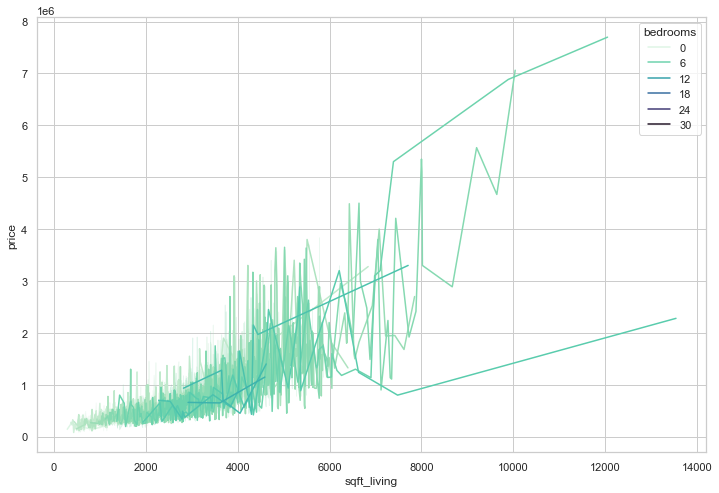

In [14]:
#lineplot for sqft living and price
fig,ax=plt.subplots(figsize=(12,8))
palette=sns.color_palette('mako_r',6)
ax=sns.lineplot(x='sqft_living',y='price',data=df,hue='bedrooms',palette='mako_r')

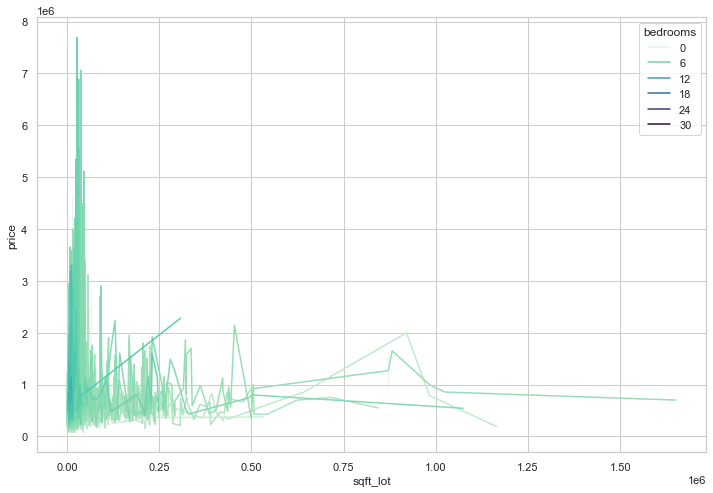

In [15]:
#lineplot for sqft lot and price
fig,ax=plt.subplots(figsize=(12,8))
palette=sns.color_palette('mako_r',6)
ax=sns.lineplot(x='sqft_lot',y='price',data=df,hue='bedrooms',palette='mako_r')

In [16]:
# Spliting target variable and independent variables
X = df.drop(['price'], axis = 1)
y = df['price']

In [17]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [18]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [19]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,bedrooms,-37831.7
1,bathrooms,50955
2,sqft_living,113.217
3,sqft_lot,-0.230951
4,floors,23674.6
5,waterfront,563564
6,view,45265.5
7,grade,122396
8,sqft_above,57.0181
9,sqft_basement,56.199


In [20]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [21]:
# Model Evaluation
from sklearn import metrics
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6527967579824485
Adjusted R^2: 0.6525211269355968
MAE: 140600.0876660895
MSE: 46798415637.93901
RMSE: 216329.41463873794


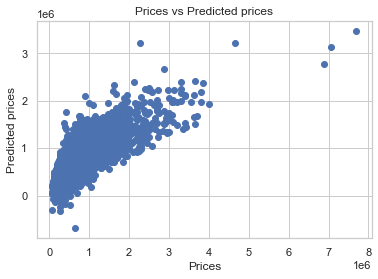

In [22]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

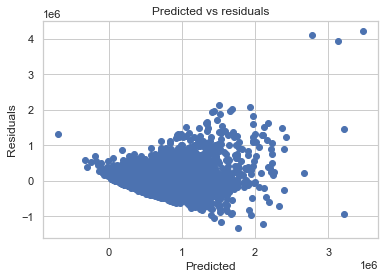

In [23]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

C:\Users\Arios\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


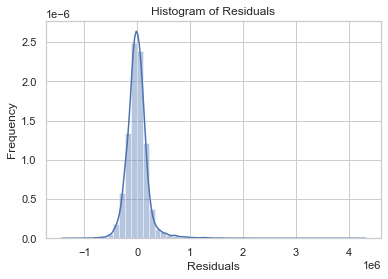

In [24]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [25]:
from statsmodels.formula.api import ols
lm = ols('price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view  + grade + sqft_above + sqft_basement + yr_built + yr_renovated', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     3669.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:34:18   Log-Likelihood:            -2.9622e+05
No. Observations:               21613   AIC:                         5.925e+05
Df Residuals:                   21601   BIC:                         5.926e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.573e+06   1.29e+05     50.964      0.000    6.32e+06    6.83e+06
bedrooms      -3.811e+04   2029.260    -18.779      0.000   -4.21e+04   -3.41e+04
bathrooms      4.747e+04   3492.654     13.593      0.000    4.06e+04    5.43e+04
sqft_living     114.2351      2.287     49.959      0.000     109.753     118.717
sqft_lot         -0.2538      0.037     -6.919      0.000      -0.326      -0.182
floors         2.195e+04   3730.322      5.884      0.000    1.46e+04    2.93e+04
waterfront     5.759e+05   1.87e+04     30.817      0.000    5.39e+05    6.13e+05
view           4.527e+04   2260.435     20.028      0.000    4.08e+04    4.97e+04
grade          1.244e+05   2169.097     57.363      0.000     1.2e+05    1.29e+05
sqft_above       55.2575      2.186     25.280      0.000      50.973      59.542
sqft_basement    58.9775      2.786     21.167      0.000      53.516      64.439
yr_built      -3731.7997     67.696    -55.126      0.000   -3864.488   -3599.111
yr_renovated      3.7554      3.870      0.970      0.332      -3.830      11.341
==============================================================================
Omnibus:                    15947.365   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1084775.182
Skew:                           2.939   Prob(JB):                         0.00
Kurtosis:                      37.206   Cond. No.                     6.19e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.1e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
lm1 = ols('price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view  + grade + sqft_above + sqft_basement + yr_built', data=df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     4036.
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:34:18   Log-Likelihood:            -2.9622e+05
No. Observations:               21613   AIC:                         5.925e+05
Df Residuals:                   21602   BIC:                         5.925e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.609e+06   1.23e+05     53.564      0.000    6.37e+06    6.85e+06
bedrooms      -3.818e+04   2027.837    -18.828      0.000   -4.22e+04   -3.42e+04
bathrooms      4.789e+04   3465.919     13.818      0.000    4.11e+04    5.47e+04
sqft_living     114.2071      2.286     49.951      0.000     109.726     118.689
sqft_lot         -0.2536      0.037     -6.912      0.000      -0.325      -0.182
floors         2.216e+04   3723.616      5.952      0.000    1.49e+04    2.95e+04
waterfront     5.769e+05   1.87e+04     30.920      0.000     5.4e+05    6.13e+05
view           4.532e+04   2259.879     20.054      0.000    4.09e+04    4.98e+04
grade          1.244e+05   2169.001     57.375      0.000     1.2e+05    1.29e+05
sqft_above       55.2698      2.186     25.286      0.000      50.985      59.554
sqft_basement    58.9372      2.786     21.155      0.000      53.476      64.398
yr_built      -3750.6631     64.845    -57.841      0.000   -3877.764   -3623.563
==============================================================================
Omnibus:                    15953.306   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1085950.068
Skew:                           2.941   Prob(JB):                         0.00
Kurtosis:                      37.224   Cond. No.                     6.19e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.1e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
def vif(df, col_i):
    cols = list(df.columns)
    cols.remove(col_i)
    cols_noti = cols
    formula = col_i + '~' + '+'.join(cols_noti)
    r2 = ols(formula, df).fit().rsquared
    return 1. / (1. - r2)

In [28]:
for i in df.columns:
    print(i, '\t', vif(df=df, col_i=i))

price 	 2.8683273762820796
bedrooms 	 1.6641831029137175
bathrooms 	 3.3546323323323315
sqft_living 	 inf
sqft_lot 	 1.0637632963641577
floors 	 1.8682165779487039
waterfront 	 1.2544538253679551
view 	 1.404953165209416
grade

<ipython-input-27-e4e6e82ae9bc>:7: RuntimeWarning: divide by zero encountered in double_scalars
  return 1. / (1. - r2)


 	 3.443659660340357
sqft_above 	 inf
sqft_basement 	 inf
yr_built 	 2.0733145753793853
yr_renovated 	 1.1108057215698408


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 2.1 MB
